In [4]:
import pandas as pd
import numpy as np  
import os, glob 
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
import keras   
from keras.preprocessing.image import ImageDataGenerator        
                                
from keras.utils import np_utils 
from keras.models import Model
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Conv2D, Dropout, Dense, Flatten, Add, Activation,ReLU, BatchNormalization,AveragePooling2D

from keras.layers import MaxPooling2D
from keras.utils import plot_model

In [5]:
device_name = tf.test.gpu_device_name()
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


### Load  and prepare cifar10 dataset.

In [6]:
dirc = 'D:/stat946'
train_dir = glob.glob(dirc+'/train/train/*')
x_train = np.asarray([cv2.imread(x_dir) for x_dir in train_dir])
print('train data shape:', x_train.shape)

train data shape: (50000, 32, 32, 3)


In [7]:
#Read labes from "train_labels.csv" file based on training images' names
y_train_df = pd.read_csv(dirc+'/train_labels.csv')
y_train = [int(y_train_df[y_train_df.id == int(x_dir.split('\\')[-1].split('.')[0])].label)\
     for x_dir in train_dir] 

In [8]:
test_dir = glob.glob(dirc+'/test/test/*')
x_test = np.asarray([cv2.imread(x_dir) for x_dir in test_dir])

In [10]:
#Typecast data samples to flot32. (usefull when using GPU)
x_train = x_train.astype('float32')     
x_test = x_test.astype('float32')

# Scale pixles of data samples between 0 and 1.
x_train /= 255
x_test /= 255

In [11]:
#convert train labels to one hot encoding
y_train = np_utils.to_categorical(y_train, num_classes)

###### Split the training data to training and validation 

In [27]:
# from sklearn.model_selection import train_test_split
# x_train, x_valid, y_train, y_valid = train_test_split(x_train,
#                                                       y_train, test_size=0.2,
#                                                       shuffle= True)

# print('Split the training data to training and validation and test')
# print(x_train.shape[0], 'train samples')
# print(x_valid.shape[0], 'validation samples')
# print(x_test.shape[0], 'test samples')

##### Set parameters

In [9]:
%matplotlib inline      
np.random.seed(2020)
batch_size = 64      #batch size
num_classes = 10      #number of classes

#### Data Augmentation

In [12]:
# "datagen" will be used later for generating data in learning phase
datagen = ImageDataGenerator(
    width_shift_range=0.25,    # randomly shift images horizontally (0.25 of total width)
    height_shift_range=0.25,   # randomly shift images vertically (0.25 of total height)
    horizontal_flip=True,      # randomly flip images
    zoom_range=[0.5,1.5])      # randomly zoom in and zoom out. (less than 1: zoom in, i.e make image larger) 

### Define CNN model

In [16]:
model = Sequential()

# 1st convolutional layer
model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2)) 

# 2nd convolutional layer
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

# 3rd convolutional layer
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

# 4th convolutional layer
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

# 5th convolutional layer
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

# Prediction layer (Fully connected)
model.add(Flatten())
model.add(Dense(units=1024,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=1024,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=10, activation="softmax"))

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_28 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_29 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 128)      

##### Compiling Model
 * loss function, optimization method and the metric

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
datagen.fit(x_train)

### Learning model and fit it on training data

In [19]:
history = model.fit_generator(datagen.flow(x_train, y_train,
                    batch_size=batch_size, shuffle=True),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=350)


Epoch 1/350
781/781 [==============================] - 43s 55ms/step - loss: 2.3223 - accuracy: 0.2355
Epoch 2/350
781/781 [==============================] - 36s 46ms/step - loss: 1.9113 - accuracy: 0.3316
Epoch 3/350
781/781 [==============================] - 36s 47ms/step - loss: 1.8672 - accuracy: 0.3575
Epoch 4/350
781/781 [==============================] - 37s 47ms/step - loss: 1.7415 - accuracy: 0.3984
Epoch 5/350
781/781 [==============================] - 36s 46ms/step - loss: 1.6081 - accuracy: 0.4417
Epoch 6/350
781/781 [==============================] - 36s 46ms/step - loss: 1.4919 - accuracy: 0.4851
Epoch 7/350
781/781 [==============================] - 35s 45ms/step - loss: 1.4375 - accuracy: 0.5028
Epoch 8/350
781/781 [==============================] - 36s 46ms/step - loss: 1.2966 - accuracy: 0.5533
Epoch 9/350
781/781 [==============================] - 37s 47ms/step - loss: 1.2633 - accuracy: 0.5694
Epoch 10/350
781/781 [==============================] - 36s 46ms/step - 

781/781 [==============================] - 36s 46ms/step - loss: 0.4409 - accuracy: 0.8523
Epoch 78/350
781/781 [==============================] - 36s 47ms/step - loss: 0.4340 - accuracy: 0.8547
Epoch 79/350
781/781 [==============================] - 37s 47ms/step - loss: 0.4359 - accuracy: 0.8547
Epoch 80/350
781/781 [==============================] - 36s 46ms/step - loss: 0.4245 - accuracy: 0.8586
Epoch 81/350
781/781 [==============================] - 36s 47ms/step - loss: 0.4299 - accuracy: 0.8540
Epoch 82/350
781/781 [==============================] - 36s 46ms/step - loss: 0.4275 - accuracy: 0.8554
Epoch 83/350
781/781 [==============================] - 37s 47ms/step - loss: 0.4206 - accuracy: 0.8593
Epoch 84/350
781/781 [==============================] - 37s 47ms/step - loss: 0.4156 - accuracy: 0.8594
Epoch 85/350
781/781 [==============================] - 37s 47ms/step - loss: 0.4227 - accuracy: 0.8576
Epoch 86/350
781/781 [==============================] - 37s 47ms/step - loss:

781/781 [==============================] - 37s 47ms/step - loss: 0.2425 - accuracy: 0.9186
Epoch 232/350
781/781 [==============================] - 36s 46ms/step - loss: 0.2379 - accuracy: 0.9215
Epoch 233/350
781/781 [==============================] - 37s 47ms/step - loss: 0.2357 - accuracy: 0.9210
Epoch 234/350
781/781 [==============================] - 37s 48ms/step - loss: 0.2442 - accuracy: 0.9167
Epoch 235/350
781/781 [==============================] - 37s 47ms/step - loss: 0.2344 - accuracy: 0.9205
Epoch 236/350
781/781 [==============================] - 37s 47ms/step - loss: 0.2336 - accuracy: 0.9212
Epoch 237/350
781/781 [==============================] - 36s 46ms/step - loss: 0.2345 - accuracy: 0.9208
Epoch 238/350
781/781 [==============================] - 36s 46ms/step - loss: 0.2296 - accuracy: 0.9226
Epoch 239/350
781/781 [==============================] - 37s 47ms/step - loss: 0.2278 - accuracy: 0.9230
Epoch 240/350
781/781 [==============================] - 37s 47ms/ste

In [20]:
# Save model
model.save(dirc+'/cnn_weights_FINAL.h5')

## Predit labels of test data

In [21]:
prd = model.predict(x_test)
prd_y = np.argmax(prd, axis=1)

In [22]:
ids = [int(x_dir.split('\\')[-1].split('.')[0]) for x_dir in test_dir] #get test images' names(id)
pred_dic = {'id':ids, 'label':prd_y}
pred_df = pd.DataFrame(data=pred_dic)
pred_df.to_csv(dirc+"/test_pred_FINAL.csv", index=False)

In [23]:
pd.read_csv(dirc+'/test_pred_FINAL.csv')

,id,label
0,0,0
1,1,2
2,10,7
3,100,2
4,1000,9
...,...,...
9995,9995,0
9996,9996,0
9997,9997,5
9998,9998,5


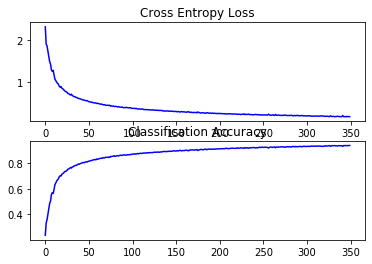

In [26]:
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')


# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.show()
